In [ ]:
a = [[1, 2, 3],
     [4, 5, 6],
      [7, 8, 9]]

In [ ]:
def predict(x, w, b):
    return x * w + b

    

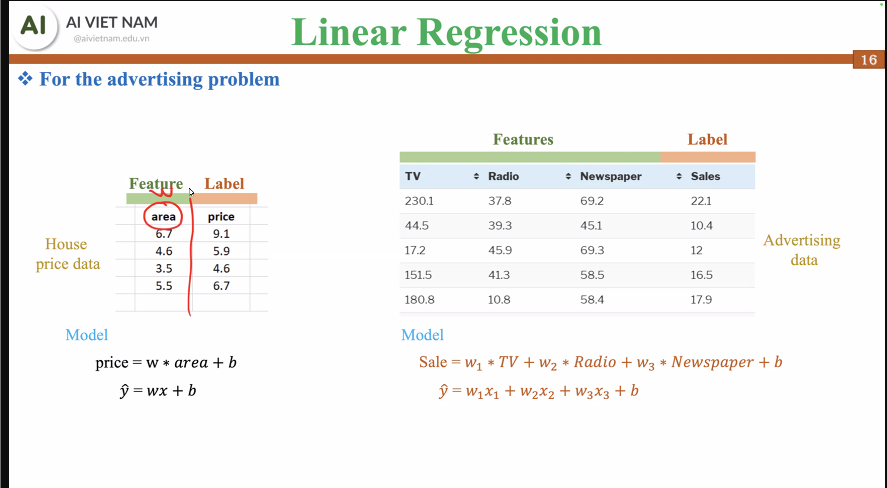

```
y_hat = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b
```

NGUYÊN LÝ : 
- MÔ HÌNH ĐÃ HỌC ĐƯỢC RỒI. MUỐN TĂNG ACC thì tăng độ lớn của data lên. 
- Còn mô hình chưa học được thì phải ...

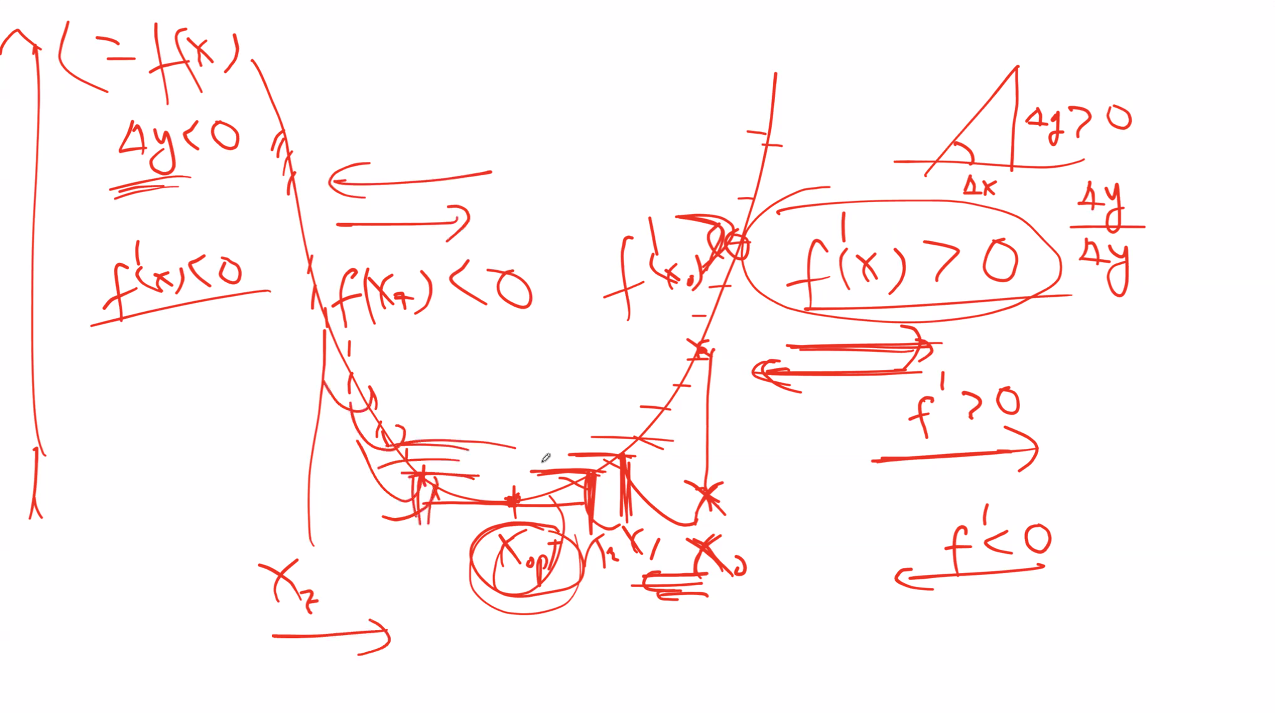

L_w_i' = 2X_i(y_hat - y)

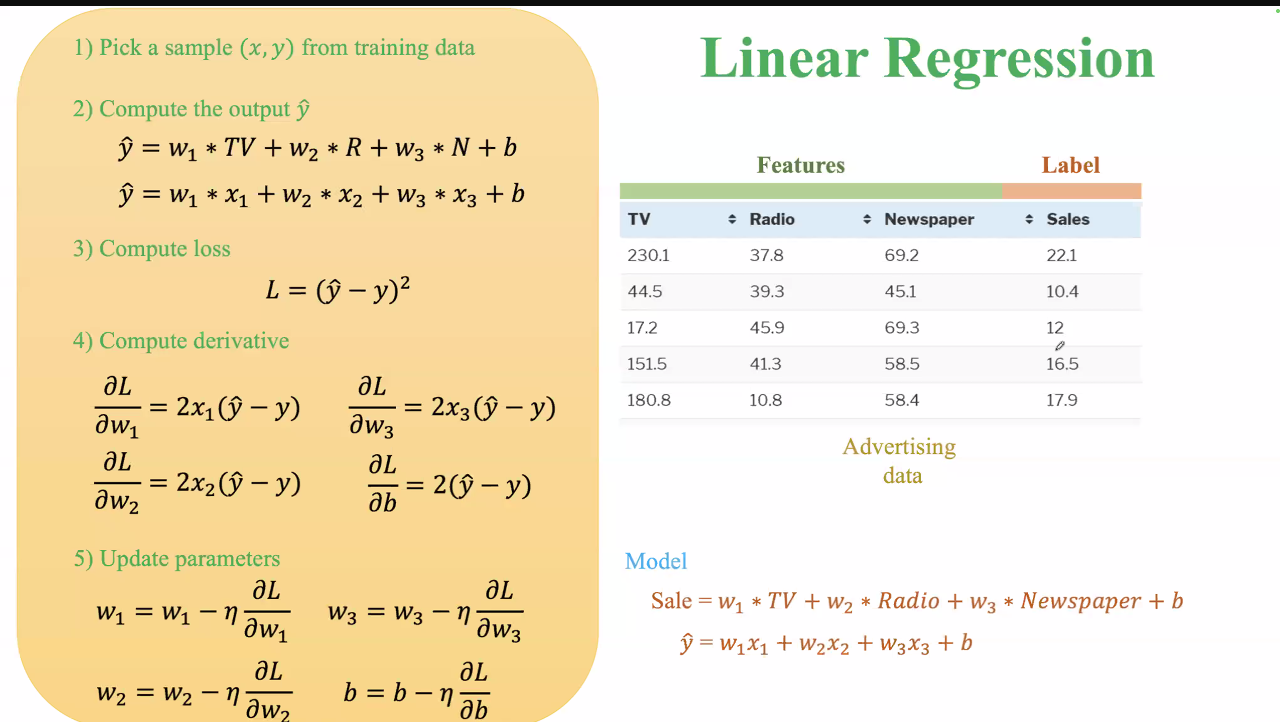

```
ad ơi, tại sao đi ngược hướng đạo hàm thì loss lại giảm ạ.
```

## Code 

In [7]:
import numpy as np
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1).tolist()

TVs = []
radios = []
newspapers = []
sales = []

for sample in data: 
    TVs.append(sample[0])
    radios.append(sample[1])
    newspapers.append(sample[2])
    sales.append(sample[3])
print('TVs:', TVs[:3])
print('Radios:', radios[:3])
print('newspapers:', newspapers[:5])
print('sales:', sales[:5])

TVs: [230.1, 44.5, 17.2]
Radios: [37.8, 39.3, 45.9]
newspapers: [69.2, 45.1, 69.3, 58.5, 58.4]
sales: [22.1, 10.4, 12.0, 16.5, 17.9]


In [8]:
len(TVs)

200

In [10]:
for i in range(len(TVs)):
    x1, x2, x3, y = TVs[i], radios[i], newspapers[i], sales[i]
    print(f'{x1} {x2} {x3}', y)
    break

230.1 37.8 69.2 22.1


In [44]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return x1 * w1 + x2 * w2 + x3 * w3 + b

def compute_loss(y_hat, y):
    return  (y_hat - y) ** 2

def compute_gradient_wi(x1, x2, x3, y, y_hat):
    dl_dw1 = 2 * (y_hat - y) * x1
    dl_dw2 = 2 * (y_hat - y) * x2
    dl_dw3 = 2 * (y_hat - y) * x3
    dl_b = 2 * (y_hat - y) * 1
    return dl_dw1, dl_dw2, dl_dw3, dl_b
def update_weights(w1, w2, w3, b, dl_dw1, dl_dw2, dl_dw3, dl_b, learning_rate):
    w1 = w1 - learning_rate * dl_dw1
    w2 = w2 - learning_rate * dl_dw2
    w3 = w3 - learning_rate * dl_dw3
    b = b - learning_rate * dl_b
    return w1, w2, w3, b

In [27]:
w1 = 0.1
w2 = 0.1 
w3 = -0.1 
b = 0 

# test case: sample 1 --> y_hat = 23.01 + 3.78 - 6.92 + 0 = 19.87
print(f"x1: {x1}, x2: {x2}, x3: {x3}, y: {y}")
y_hat = predict(x1, x2, x3, w1, w2, w3, b)
print(y_hat)



x1: 230.1, x2: 37.8, x3: 69.2, y: 22.1
19.87
19.87 22.1
4.972900000000002


In [42]:
# test: y = 22.1, y_hat = 19.87 --> loss = 2.23
print(y_hat, y)
print(compute_loss(y_hat, y))


12.014627667289025 18.4
12.014627667289025 18.4
40.77297982735078


In [31]:

# test: x1: 230.1, x2: 37.8, x3: 69.2, y: 22.1 
# -> dl_dw1 = 2.23 * 230.1, dl_dw2 = 2.23 * 37.8, dl_dw3 = 2.23 * 69.2, dl_b = 2.23 * 1
dl_dw1, dl_dw2, dl_dw3, dl_b = compute_gradient_wi(x1, x2, x3, y, y_hat)
print(dl_dw1, dl_dw2, dl_dw3, dl_b)

-1026.246 -168.58800000000002 -308.63200000000006 -4.460000000000001


In [39]:
# test: w1=0.1, lr=0.1, dl_dw1 = -1026.246 ----> w1=w1-lr*dl_dw1 = 0.1 - 0.1 * -1026.246 = 102.625  
lr = 0.1
w1, w2, w3, b = update_weights(w1, w2, w3, b, dl_dw1, dl_dw2, dl_dw3, dl_b, lr)
print(w1, w2, w3, b)

307.97380000000004 50.67640000000001 92.48960000000002 1.3380000000000003


Thà làm chậm nhưng đến đâu đúng đến đó. 
Test cases 2, 3 cái => tự tin làm đúng => chạy model 

## Train

In [45]:
w1 = 0.1
w2 = 0.1
w3 = 0.1
b = -0.1
lr = 0.00001

# lưu lại giá trị loss thay vì in ra. 
losses = []

for i in range(200): 
    # get data 
    x1, x2, x3, y = TVs[i], radios[i], newspapers[i], sales[i]

    # train
    y_hat = predict(x1, x2, x3, w1, w2, w3, b)
    loss = compute_loss(y_hat, y)
    losses.append(loss)
    # print(loss)

    dl_dw1, dl_dw2, dl_dw3, dl_b = compute_gradient_wi(x1, x2, x3, y, y_hat)
    w1, w2, w3, b = update_weights(w1, w2, w3, b, dl_dw1, dl_dw2, dl_dw3, dl_b, lr)

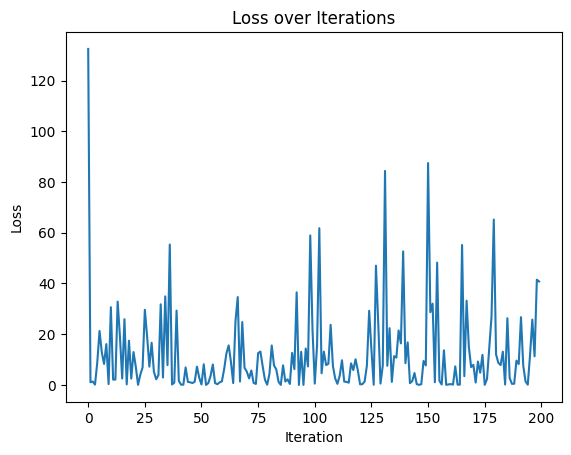

In [46]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

Bên trên mới đi lướt qua 1 lần

In [48]:
w1 = 0.1
w2 = 0.1
w3 = 0.1
b = -0.1
lr = 0.00001

# lưu lại giá trị loss thay vì in ra. 
losses = []
for _ in range(10):
    for i in range(200): 
        # get data 
        x1, x2, x3, y = TVs[i], radios[i], newspapers[i], sales[i]

        # train
        y_hat = predict(x1, x2, x3, w1, w2, w3, b)
        loss = compute_loss(y_hat, y)
        losses.append(loss)
        # print(loss)

        dl_dw1, dl_dw2, dl_dw3, dl_b = compute_gradient_wi(x1, x2, x3, y, y_hat)
        w1, w2, w3, b = update_weights(w1, w2, w3, b, dl_dw1, dl_dw2, dl_dw3, dl_b, lr)

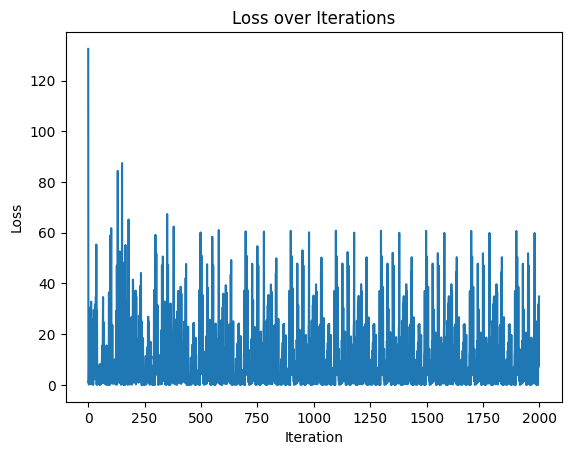

In [49]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

```
ad ơi, có phải là cái batch_size gì đó đúng không ạ,
```

Ví dụ: 2 ông thầy có nhận xét và chỉnh sửa khác nhau. 
- Cứ chỉnh người 1 lại người 2 lại người 1 lại người 2. 
=> Khi chúng ta bốc ra 1 sample, trọng số đi ngược hướng đạo hàm là KÉO LOSS cho sample hiện tại chứ ko phải loss cho sample tiếp theo. 

=> Cập nhật bằng cách tham khảo ý kiến 2 ông thầy 1 lúc , có bảng thống nhất dựa vào chỉnh sửa. => Train theo kiểu gọi là dùng 10 samples 1 lúc. 

(batch_size = 10). 

```
learning rate ?
```
ad có cách nào để đưa ra learning rate không ạ..chứ như bài này e để 0.01 chạy đưa ra kết quả nan ạ

Thay vì chọn learning rate bằng bao nhiêu 10^-5 => ... Thì chuẩn hoá data và mình cứ chọn 0.01

```
ad ơi, các tham số w1, w2, w3, b thường được set giá trị ban đầu như nào ạ. 
```
Initialization. 

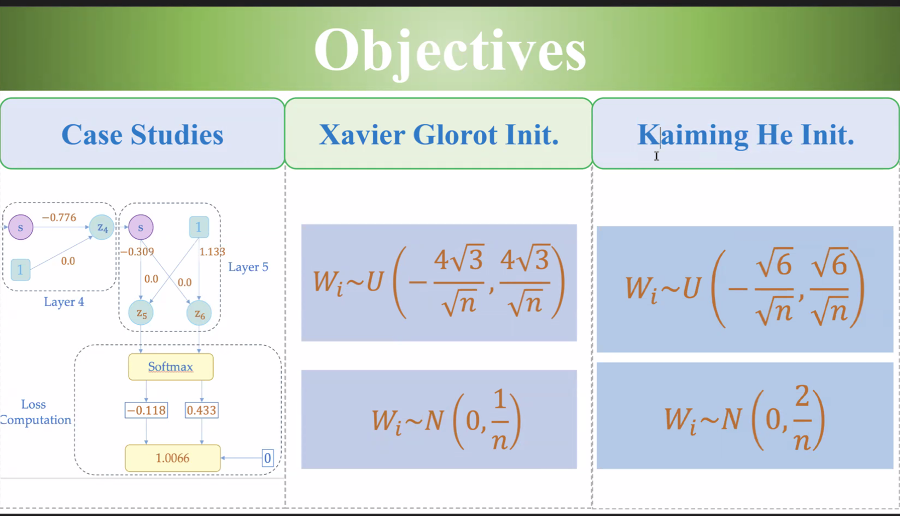

Uniform initialization, hoặc Gaussian initialization. 

Cho những bài toán khác nhau: loss và công thức được GIỮ NGUYÊN